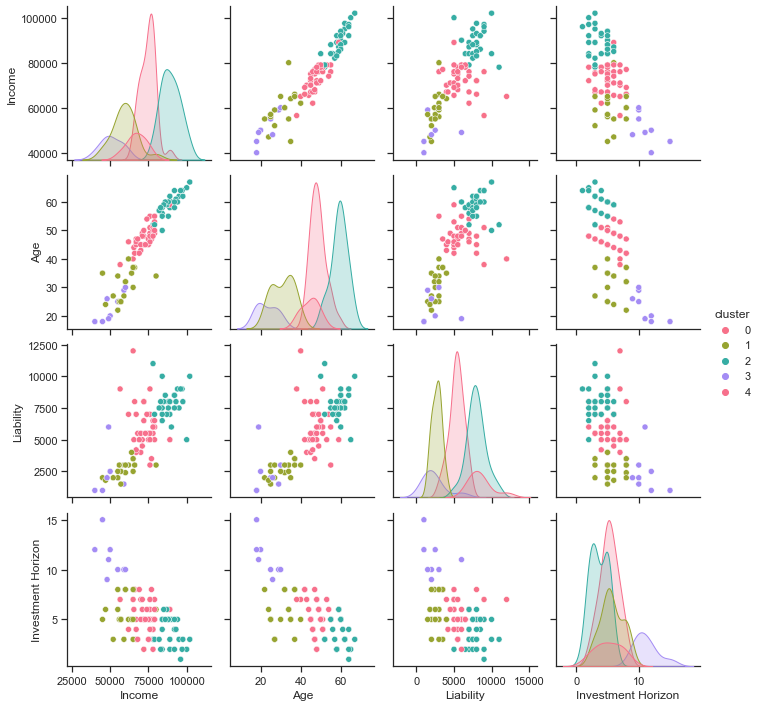

    Income  Age  Liability  Investment Horizon  \
0    50000   20       2500                  12   
1    45000   18       1000                  15   
2    72000   45       8000                   5   
3    65000   40      12000                   7   
4    70000   43       4000                   7   
..     ...  ...        ...                 ...   
85   83000   58       8000                   2   
86   92000   60       8500                   5   
87   96000   64       9000                   1   
88   73000   45       5500                   5   
89   78000   48       6000                   2   

                                  cluster_description  
0   High-Income, Short-Term Goals: Align investmen...  
1   High-Income, Short-Term Goals: Align investmen...  
2   High-Income, Young Investors: Focus on high-gr...  
3   High-Income, Young Investors: Focus on high-gr...  
4   Diverse Income and Goals: Offer a range of inv...  
..                                                ...  
85  Low

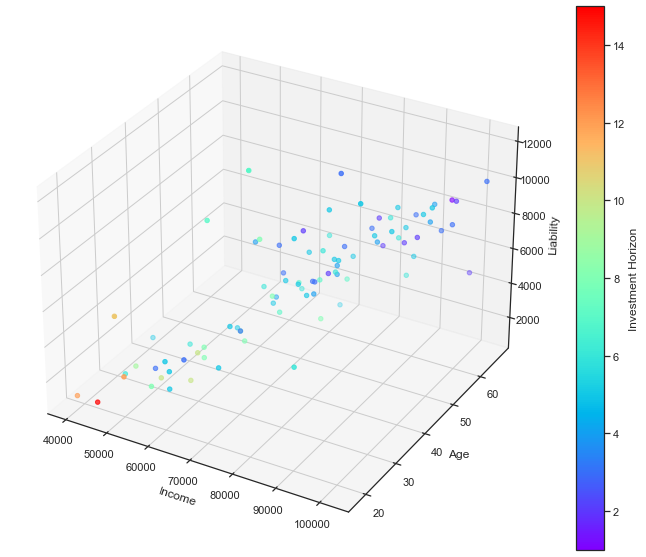

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample user_data DataFrame
user_data = pd.read_csv("Dataset.csv")

# Displaying the user_data
# print(user_data)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_data)

# Choose the number of clusters (e.g., 5)
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
user_data['cluster'] = kmeans.fit_predict(scaled_data)

# Create a scatterplot matrix with clusters
sns.set(style="ticks")
sns.pairplot(user_data, hue="cluster", palette="husl")
plt.show()

# Define logic for each cluster
def cluster_logic(cluster):
    if cluster == 0:
        return "High-Income, Young Investors: Focus on high-growth investments and long-term wealth building."
    elif cluster == 1:
        return "Medium-Income, Mid-Age Investors: Consider a balanced mix of investments with moderate risk."
    elif cluster == 2:
        return "Low-Income, Short-Term Planners: Prioritize low-risk, income-generating investments and budgeting."
    elif cluster == 3:
        return "High-Income, Short-Term Goals: Align investments with short-term financial objectives and provide regular updates."
    elif cluster == 4:
        return "Diverse Income and Goals: Offer a range of investment options and financial tools to cater to diverse needs."

# Apply the cluster logic to each row
user_data['cluster_description'] = user_data['cluster'].apply(cluster_logic)

# Display the resulting DataFrame with cluster descriptions
print(user_data[['Income', 'Age', 'Liability', 'Investment Horizon','cluster_description']])

#Creating a 4D Graph 
x=user_data['Income']
y=user_data['Age']
z=user_data['Liability']
color=user_data['Investment Horizon']

#Adjusting the figure size
fig = plt.figure(figsize=(12, 10))

#Create a 2D scatter plot in 3D space with color encoding
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x,y,z, c=color, cmap='rainbow')

#Add a colorbar to represent the fourth dimension
cbar = plt.colorbar(scatter)
cbar.set_label('Investment Horizon')

#Labeling the axis
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Liability')

plt.show()